# Etudes des résultats à un examen d'étudiants portugais

Sereyvuth, Céline et DilvaCes données portent sur les résultats des élèves de deux écoles portugaises dans l'enseignement secondaire. Les attributs des données comprennent les notes des élèves, les caractéristiques démographiques, sociales et scolaires)et elles ont été recueillies à l'aide de rapports scolaires et de questionnaires. Deux ensembles de données sont fournis concernant la performance dans deux sujets distincts : Mathématiques (mat) et portugais (por). 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('students.csv',index_col=0)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### On se concentre sur plusieurs facteurs:

#### Contexte familial: 
- medu 
- fedu
- famsup
- famrel 
<p><br\>

#### Caractéristiques extra-scolaires:
- paid
- internet
- freetime
- health
<p><br\>
    
#### Attitude scolaire:
- absences 
- G1,G2
- studytime


### On se demande si l'école est une donnée importante.
Pour cela on affiche les résultats des examens finaux par écoles. 
<p><br\>

school
GP    345
MS     46
dtype: int64

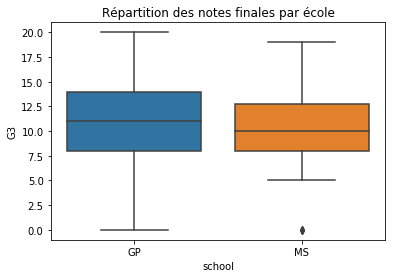

In [12]:
sns.boxplot("school","G3",data = df)
plt.title("Répartition des notes finales par école")
df.groupby("school").size()


<p>
    
#### On remarque que l'écart des notes est plus petit pour l'école GP car il y a 345 élèves de cette école contre 46 pour l'école MS.
<p><br\>

### Variables étudiées qui impliquent une faible corrélation avec la note finale:
- adresse
- sexe
- age
- famsup
- famrel
- health
- internet
- freetime

Nombre de filles :  208

Nombre de garçons :  187

Moyenne des notes des filles :  9.966346153846153

Moyenne des notes des garçons :  10.914438502673796


Text(0.5,1,'Répartition des notes finales par sexe')

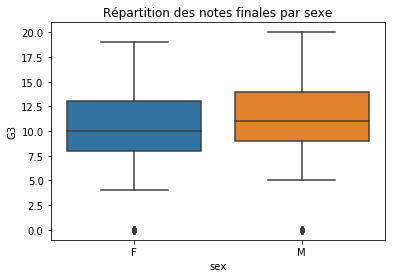

In [16]:
sns.boxplot("sex","G3",data = df)
print("Nombre de filles : ",df[df['sex']=='F']['G3'].value_counts().sum())
print("\nNombre de garçons : ",df[df['sex']=='M']['G3'].value_counts().sum())
print("\nMoyenne des notes des filles : ",df[df['sex']=='F']['G3'].mean())
print("\nMoyenne des notes des garçons : ",df[df['sex']=='M']['G3'].mean())

plt.title("Répartition des notes finales par sexe")

#### Les filles ont une moyenne légèrement inférieure à celle des garçons. Il y a cependant 21 filles de plus dans cette base, ce qui fausse la proportion.

### Niveau d'études des parents

Medu
0      3
1     59
2    103
3     99
4    131
dtype: int64

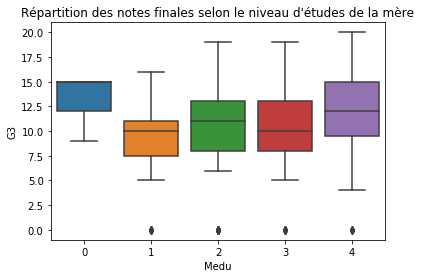

In [19]:
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Répartition des notes finales selon le niveau d'études de la mère")
df.groupby('Medu').size()

Fedu
0      2
1     82
2    115
3    100
4     96
dtype: int64

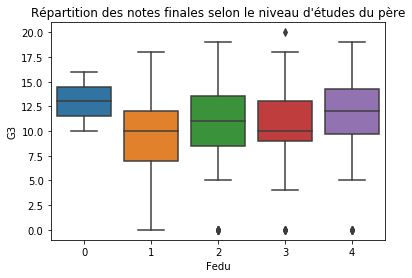

In [20]:
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Répartition des notes finales selon le niveau d'études du père")
df.groupby('Fedu').size()

### Corrélation entre note finale (G3) et temps d'étude hebdomadaire

studytime
1    105
2    198
3     65
4     27
dtype: int64

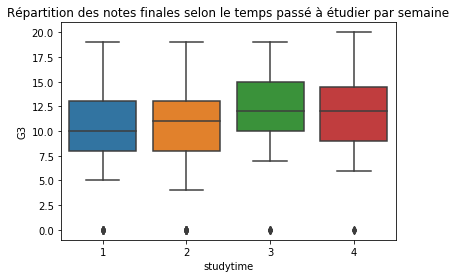

In [22]:
sns.boxplot("studytime","G3",data = df)
plt.title("Répartition des notes finales selon le temps passé à étudier par semaine")
df.groupby('studytime').size()

### Corrélation entre note finale et notes des précédents semestres (G1, G2)

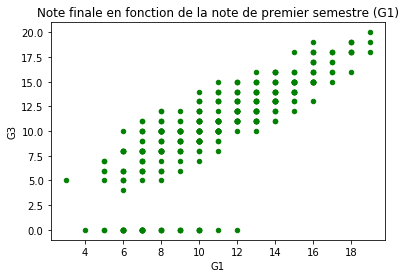

In [25]:
df.plot.scatter(title='Note finale en fonction de la note de premier semestre (G1)',x='G1',y='G3',c='green')

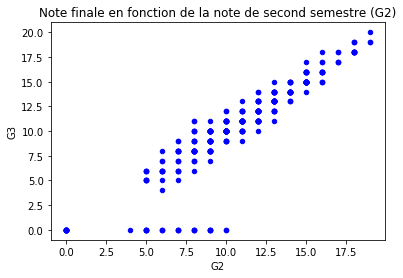

In [26]:
df.plot.scatter(title='Note finale en fonction de la note de second semestre (G2)',x='G2',y='G3',c='blue')

###### Corrélation linéaire importante entre notes des précédents semestres et note finale.

### Corrélation entre note finale et nombre d'absences

Text(0.5,1,'Répartition des notes finales selon les absences')

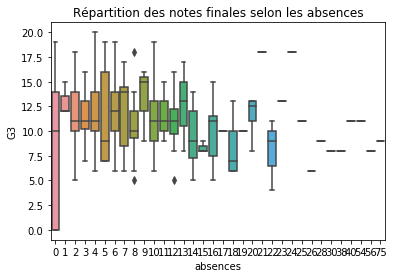

In [33]:
sns.boxplot("absences","G3",data = df)
plt.title("Répartition des notes finales selon les absences")

#### Corrélation négative entre absences et note finale mais au bout d'un certain nombre d'absences (à peu près 10). Les notes restent tout de même élevées dans ce cas, on ne peut donc pas prédire avec le nombre d'absences.


## Corrélation entre les variables retenues

In [35]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [48]:
df2 = df.drop(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','famrel','studytime',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'Dalc',
       'Walc', 'health'], axis=1)

In [49]:
df2.head()

,absences,G1,G2,G3
0,6,5,6,6
1,4,5,5,6
2,10,7,8,10
3,2,15,14,15
4,4,6,10,10


In [50]:
df2.corr()

,absences,G1,G2,G3
absences,1.000000,-0.031003,-0.031777,0.034247
G1,-0.031003,1.000000,0.852118,0.801468
G2,-0.031777,0.852118,1.000000,0.904868
G3,0.034247,0.801468,0.904868,1.000000


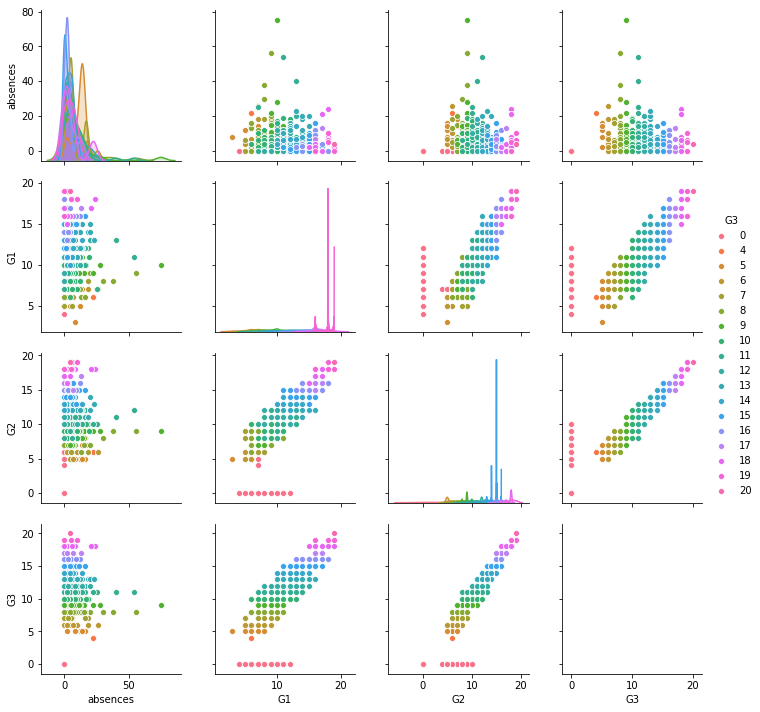

In [51]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df2, hue='G3')